In [6]:
#Impor Library SK - Fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import warnings
import pandas as pd

warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv('data_air.csv', sep=';')
df.describe()

,BOD,DO,TSS
count,26.00000,26.000000,26.000000
mean,3.90500,8.300769,9.561923
std,1.21107,0.803990,4.216010
min,2.07000,7.080000,3.550000
25%,2.99000,7.780000,6.212500
50%,3.67000,8.230000,9.650000
75%,4.73000,8.677500,11.450000
max,6.69000,10.420000,18.600000


# Fuzzyfikasi

In [33]:
# Menentukan Semesta Pembicaraan
# Antesenden(Kondisi)
bod = ctrl.Antecedent(np.arange(2.07, 6.69, 1), 'Biochemical Oxygen Demand')
do = ctrl.Antecedent(np.arange(7.08, 10.42, 1), 'Dissolved Oxygen')

# Konsekuen(Kesimpulan)
tss = ctrl.Consequent(np.arange(3.55, 18.60, 1), 'Total Suspended Solid')

In [29]:
def fungsi_segitiga(x, amb):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < x, x < m))[0]
        miu[idx] = (x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < x, x < b))[0]
        miu[idx] = (b - x[idx]) / float(b - m)

    idx = np.nonzero(x == m)
    miu[idx] = 1
    
    return miu

In [110]:
def miu_fungsi_segitiga(array_x, amb, x_i):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(array_x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < array_x, array_x < m))[0]
        miu[idx] = (array_x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < array_x, array_x < b))[0]
        miu[idx] = (b - array_x[idx]) / float(b - m)

    idx = np.nonzero(array_x == m)
    miu[idx] = 1

    dict_fuzzy=res = {round(array_x[i],2): miu[i] for i in range(len(array_x))}
    print(dict_fuzzy)
    hasil = dict_fuzzy[x_i]

    return hasil

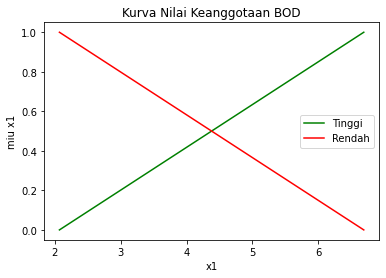

In [38]:
# Pembentukan Himpunan Fuzzy BOD [skfuzz]
bod['tinggi'] = fuzz.trimf(bod.universe, [2.07, 6.69, 6.69])
bod['rendah'] = fuzz.trimf(bod.universe, [2.07, 2.07, 6.69])

# Pembentukan Himpunan Fuzzy BOD [fungsi buat sendiri]
x_bod= np.arange(2.07, 6.69, 0.01) # Semesta Pembicaraan
amb_tinggi = [2.07, 6.69, 6.69]
amb_rendah = [2.07, 2.07, 6.69]

miu_bod_tinggi = fungsi_segitiga(x_bod, amb_tinggi)
miu_bod_rendah = fungsi_segitiga(x_bod, amb_rendah)

import matplotlib.pyplot as plt
plt.plot(x_bod, miu_bod_tinggi, label = "Tinggi", color='green')
plt.plot(x_bod, miu_bod_rendah, label = "Rendah", color='red')
plt.xlabel('x1')
plt.ylabel('miu x1')
plt.title('Kurva Nilai Keanggotaan BOD')
plt.legend()
plt.show()

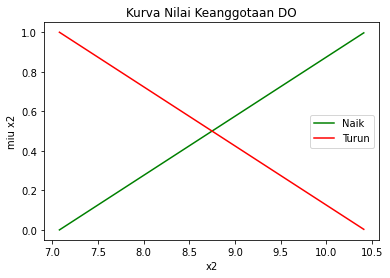

In [40]:
# Pembentukan Himpunan Fuzzy DO [skfuzz]
do['naik']  = fuzz.trimf(do.universe, [7.08, 10.42, 10.42])
do['turun'] = fuzz.trimf(do.universe, [7.08,  7.08, 10.42])

# Pembentukan Himpunan Fuzzy DO [fungsi buat sendiri]
x_do= np.arange(7.08, 10.42, 0.01) # Semesta Pembicaraan
amb_naik  = [7.08, 10.42, 10.42]
amb_turun = [7.08,  7.08, 10.42]

miu_do_naik  = fungsi_segitiga(x_do, amb_naik)
miu_do_turun = fungsi_segitiga(x_do, amb_turun)

import matplotlib.pyplot as plt
plt.plot(x_do, miu_do_naik,  label = "Naik",  color='green')
plt.plot(x_do, miu_do_turun, label = "Turun", color='red')
plt.xlabel('x2')
plt.ylabel('miu x2')
plt.title('Kurva Nilai Keanggotaan DO')
plt.legend()
plt.show()

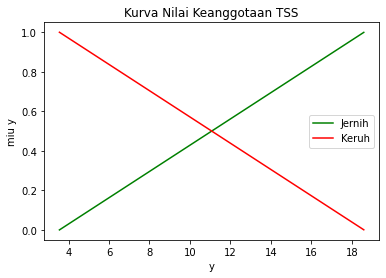

In [35]:
# Pembentukan Himpunan Fuzzy TSS [skfuzz]
tss['jernih']  = fuzz.trimf(tss.universe, [3.55, 18.60, 18.60])
tss['keruh']   = fuzz.trimf(tss.universe, [3.55,  3.55, 18.60])

# Pembentukan Himpunan Fuzzy TSS [fungsi buat sendiri]
x_tss= np.arange(3.55, 18.60, 0.01) # Semesta Pembicaraan
amb_jernih  = [3.55, 18.60, 18.60]
amb_keruh  = [3.55,  3.55, 18.60]

miu_tss_jernih  = fungsi_segitiga(x_tss, amb_jernih)
miu_tss_keruh   = fungsi_segitiga(x_tss, amb_keruh)

import matplotlib.pyplot as plt
plt.plot(x_tss, miu_tss_jernih,  label = "Jernih",  color='green')
plt.plot(x_tss, miu_tss_keruh, label = "Keruh", color='red')
plt.xlabel('y')
plt.ylabel('miu y')
plt.title('Kurva Nilai Keanggotaan TSS')
plt.legend()
plt.show()

Rule Definition

bod --> tinggi, rendah

do --> naik, turun

tss --> jernih, keruh

In [41]:
aturan1=ctrl.Rule(bod['tinggi'] & do['naik'], tss['keruh'])
aturan2=ctrl.Rule(bod['tinggi'] & do['turun'], tss['jernih'])
aturan3=ctrl.Rule(bod['rendah'] & do['naik'], tss['jernih'])
aturan4=ctrl.Rule(bod['rendah'] & do['turun'], tss['keruh'])

In [43]:
fuzzy_tss_ctrl = ctrl.ControlSystem([aturan1, aturan2, aturan3, aturan4])

fuzzy_tss= ctrl.ControlSystemSimulation(fuzzy_tss_ctrl)

In [9]:
aturan1=ctrl.Rule(bod['kering'] & penyinaran['terang'] & kec_angin['cepat'], temperatur['panas'])
aturan2=ctrl.Rule(avg_kelembapan['kering'] & penyinaran['terang'] & kec_angin['cepat'], temperatur['dingin'])
aturan3=ctrl.Rule(avg_kelembapan['basah'] & penyinaran['terang'] & kec_angin['cepat'], temperatur['panas'])
aturan4=ctrl.Rule(avg_kelembapan['kering'] & penyinaran['redup'] & kec_angin['cepat'], temperatur['panas'])
aturan5=ctrl.Rule(avg_kelembapan['basah'] & penyinaran['terang'] & kec_angin['cepat'], temperatur['dingin'])
aturan6=ctrl.Rule(avg_kelembapan['basah'] & penyinaran['redup'] & kec_angin['cepat'], temperatur['panas'])
aturan7=ctrl.Rule(avg_kelembapan['kering'] & penyinaran['terang'] & kec_angin['lambat'], temperatur['panas'])
aturan8=ctrl.Rule(avg_kelembapan['kering'] & penyinaran['terang'] & kec_angin['lambat'], temperatur['dingin'])

In [10]:
fuzzy_suhu_ctrl = ctrl.ControlSystem([aturan1, aturan2, aturan3, aturan5, aturan6, aturan7, aturan8])

fuzzy_suhu= ctrl.ControlSystemSimulation(fuzzy_suhu_ctrl)

Fuzzyfikasi BOD

In [157]:
def fuzzyfikasi(x_array, amd_1, amd_2, x, label_1, label_2):
    batas = (max(x_array)+min(x_array))/2
    print(batas)
    hasil=0
    if x < batas:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    return hasil, label_hasil

In [60]:
x_bod= np.arange(2.07, 6.69, 0.01)
amb_tinggi = [2.07, 6.69, 6.69]
amb_rendah = [2.07, 2.07, 6.69]

In [102]:
hasil=miu_fungsi_segitiga(x_bod, amb_tinggi, float(2.84))

In [107]:
hasil=fuzzyfikasi(x_bod, amb_tinggi, amb_rendah, 2.84, "Tinggi", "Rendah")

In [162]:
x_bod= np.arange(2.07, 6.69, 0.01)
amb_tinggi = [2.07, 6.69, 6.69]
amb_rendah = [2.07, 2.07, 6.69]

fuzzifikasi_BOD=[]
miu_BOD=[]
for i in df.BOD:
    hasil=fuzzyfikasi(x_bod, amb_tinggi, amb_rendah, i, "Rendah", "Tinggi")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_BOD.append(fuzz)
    miu_BOD.append(m)
    
len(fuzzifikasi_BOD)

4.379999999999951
{2.07: 0.0, 2.08: 0.002164502164502118, 2.09: 0.004329004329004236, 2.1: 0.006493506493506353, 2.11: 0.008658008658008472, 2.12: 0.01082251082251059, 2.13: 0.012987012987012707, 2.14: 0.015151515151514826, 2.15: 0.017316017316016945, 2.16: 0.01948051948051906, 2.17: 0.02164502164502118, 2.18: 0.023809523809523298, 2.19: 0.025974025974025414, 2.2: 0.028138528138527533, 2.21: 0.03030303030302965, 2.22: 0.03246753246753177, 2.23: 0.03463203463203389, 2.24: 0.036796536796536, 2.25: 0.03896103896103812, 2.26: 0.04112554112554024, 2.27: 0.04329004329004236, 2.28: 0.04545454545454448, 2.29: 0.047619047619046596, 2.3: 0.04978354978354871, 2.31: 0.05194805194805083, 2.32: 0.054112554112552946, 2.33: 0.056277056277055065, 2.34: 0.058441558441557184, 2.35: 0.0606060606060593, 2.36: 0.06277056277056142, 2.37: 0.06493506493506354, 2.38: 0.06709956709956566, 2.39: 0.06926406926406778, 2.4: 0.07142857142856988, 2.41: 0.073593073593072, 2.42: 0.07575757575757412, 2.43: 0.077922077922

26

In [163]:
x_do= np.arange(7.08, 10.43, 0.01) 
amb_naik  = [7.08, 10.42, 10.42]
amb_turun = [7.08,  7.08, 10.42]
    
fuzzifikasi_DO=[]
miu_DO=[]
for i in df.DO:
    hasil=fuzzyfikasi(x_do, amb_naik, amb_turun, i, "Turun", "Naik")
    fuzz = hasil[1]
    m =hasil[0]
    fuzzifikasi_DO.append(fuzz)
    miu_DO.append(m)
len(fuzzifikasi_DO)

8.749999999999964
{7.08: 0.0, 7.09: 0.0029940119760478406, 7.1: 0.005988023952095681, 7.11: 0.008982035928143521, 7.12: 0.011976047904191362, 7.13: 0.014970059880239202, 7.14: 0.017964071856287043, 7.15: 0.020958083832334884, 7.16: 0.023952095808382725, 7.17: 0.026946107784430566, 7.18: 0.029940119760478404, 7.19: 0.03293413173652625, 7.2: 0.035928143712574086, 7.21: 0.03892215568862192, 7.22: 0.04191616766466977, 7.23: 0.044910179640717605, 7.24: 0.04790419161676545, 7.25: 0.05089820359281329, 7.26: 0.05389221556886113, 7.27: 0.05688622754490897, 7.28: 0.05988023952095681, 7.29: 0.06287425149700465, 7.3: 0.0658682634730525, 7.31: 0.06886227544910033, 7.32: 0.07185628742514817, 7.33: 0.07485029940119602, 7.34: 0.07784431137724385, 7.35: 0.08083832335329169, 7.36: 0.08383233532933954, 7.37: 0.08682634730538738, 7.38: 0.08982035928143521, 7.39: 0.09281437125748306, 7.4: 0.0958083832335309, 7.41: 0.09880239520957873, 7.42: 0.10179640718562658, 7.43: 0.10479041916167442, 7.44: 0.1077844311

26

In [164]:
x_tss= np.arange(3.55, 18.61, 0.01)
amb_jernih  = [3.55, 18.60, 18.60]
amb_keruh   = [3.55,  3.55, 18.60]
    
fuzzifikasi_TSS=[]
miu_TSS=[]
for i in df.TSS:
    hasil=fuzzyfikasi(x_tss, amb_jernih, amb_keruh, i, "Keruh", "Jernih")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_TSS.append(fuzz)
    miu_TSS.append(m)
len(fuzzifikasi_TSS)

11.07499999999984
{3.55: 0.0, 3.56: 0.0006644518272425108, 3.57: 0.0013289036544850215, 3.58: 0.001993355481727532, 3.59: 0.002657807308970043, 3.6: 0.0033222591362125535, 3.61: 0.003986710963455064, 3.62: 0.0046511627906975755, 3.63: 0.005315614617940086, 3.64: 0.0059800664451825965, 3.65: 0.006644518272425107, 3.66: 0.007308970099667618, 3.67: 0.007973421926910128, 3.68: 0.008637873754152639, 3.69: 0.009302325581395151, 3.7: 0.009966777408637661, 3.71: 0.010631229235880172, 3.72: 0.011295681063122683, 3.73: 0.011960132890365193, 3.74: 0.012624584717607704, 3.75: 0.013289036544850214, 3.76: 0.013953488372092725, 3.77: 0.014617940199335235, 3.78: 0.015282392026577746, 3.79: 0.015946843853820256, 3.8: 0.016611295681062767, 3.81: 0.017275747508305277, 3.82: 0.017940199335547788, 3.83: 0.018604651162790302, 3.84: 0.019269102990032812, 3.85: 0.019933554817275323, 3.86: 0.020598006644517834, 3.87: 0.021262458471760344, 3.88: 0.021926910299002855, 3.89: 0.022591362126245365, 3.9: 0.023255813

{3.55: 1.0, 3.56: 0.9993355481727576, 3.57: 0.998671096345515, 3.58: 0.9980066445182726, 3.59: 0.99734219269103, 3.6: 0.9966777408637876, 3.61: 0.996013289036545, 3.62: 0.9953488372093026, 3.63: 0.9946843853820599, 3.64: 0.9940199335548175, 3.65: 0.9933554817275749, 3.66: 0.9926910299003325, 3.67: 0.9920265780730899, 3.68: 0.9913621262458475, 3.69: 0.9906976744186049, 3.7: 0.9900332225913625, 3.71: 0.9893687707641198, 3.72: 0.9887043189368775, 3.73: 0.9880398671096348, 3.74: 0.9873754152823924, 3.75: 0.9867109634551497, 3.76: 0.9860465116279074, 3.77: 0.9853820598006647, 3.78: 0.9847176079734223, 3.79: 0.9840531561461797, 3.8: 0.9833887043189373, 3.81: 0.9827242524916947, 3.82: 0.9820598006644523, 3.83: 0.9813953488372097, 3.84: 0.9807308970099673, 3.85: 0.9800664451827247, 3.86: 0.9794019933554823, 3.87: 0.9787375415282397, 3.88: 0.9780730897009973, 3.89: 0.9774086378737546, 3.9: 0.9767441860465123, 3.91: 0.9760797342192696, 3.92: 0.9754152823920272, 3.93: 0.9747508305647846, 3.94: 0.

26

In [165]:
df_fuzz = pd.DataFrame({"BOD":df.BOD,
                        "DO":df.DO,
                        "TSS":df.TSS,
                        "BOD_fuzz": fuzzifikasi_BOD,
                       "DO_fuzz": fuzzifikasi_DO,
                       "TSS_fuzz": fuzzifikasi_TSS,
                       "miu_BOD":miu_BOD,
                       "miu_DO":miu_DO,
                       "miu_TSS":miu_TSS,})
df_fuzz

,BOD,DO,TSS,BOD_fuzz,DO_fuzz,TSS_fuzz,miu_BOD,miu_DO,miu_TSS
0,2.84,8.67,10.80,Rendah,Turun,Keruh,1.666667e-01,4.760479e-01,4.817276e-01
1,2.98,8.77,16.20,Rendah,Naik,Jernih,1.969697e-01,4.940120e-01,1.594684e-01
2,3.19,9.37,10.35,Rendah,Naik,Keruh,2.424242e-01,3.143713e-01,4.518272e-01
3,2.51,8.29,7.70,Rendah,Turun,Keruh,9.523810e-02,3.622754e-01,2.757475e-01
4,5.38,8.48,8.50,Tinggi,Turun,Keruh,2.835498e-01,4.191617e-01,3.289037e-01
5,3.50,8.10,6.20,Rendah,Turun,Keruh,3.095238e-01,3.053892e-01,1.760797e-01
6,2.07,7.49,6.15,Rendah,Turun,Keruh,0.000000e+00,1.227545e-01,1.727575e-01
7,4.75,7.76,10.35,Tinggi,Turun,Keruh,4.199134e-01,2.035928e-01,4.518272e-01
8,4.67,8.17,15.20,Tinggi,Turun,Jernih,4.372294e-01,3.263473e-01,2.259136e-01
9,4.50,7.78,11.65,Tinggi,Turun,Jernih,4.740260e-01,2.095808e-01,4.617940e-01


In [174]:
df_fuzz['Rule'] = "Jika X1 " + df_fuzz['BOD_fuzz'] + " dan X2 " + df_fuzz['DO_fuzz'] + " maka Y " + df_fuzz['TSS_fuzz']
df_fuzz.head()

,BOD,DO,TSS,BOD_fuzz,DO_fuzz,TSS_fuzz,miu_BOD,miu_DO,miu_TSS,Rule
0,2.84,8.67,10.80,Rendah,Turun,Keruh,0.166667,0.476048,0.481728,Jika X1 Rendah dan X2 Turun maka Y Keruh
1,2.98,8.77,16.20,Rendah,Naik,Jernih,0.196970,0.494012,0.159468,Jika X1 Rendah dan X2 Naik maka Y Jernih
2,3.19,9.37,10.35,Rendah,Naik,Keruh,0.242424,0.314371,0.451827,Jika X1 Rendah dan X2 Naik maka Y Keruh
3,2.51,8.29,7.70,Rendah,Turun,Keruh,0.095238,0.362275,0.275748,Jika X1 Rendah dan X2 Turun maka Y Keruh
4,5.38,8.48,8.50,Tinggi,Turun,Keruh,0.283550,0.419162,0.328904,Jika X1 Tinggi dan X2 Turun maka Y Keruh


In [175]:
df_fuzz['Rule'].value_counts()

Jika X1 Rendah dan X2 Turun maka Y Keruh     10
Jika X1 Tinggi dan X2 Turun maka Y Keruh      6
Jika X1 Tinggi dan X2 Turun maka Y Jernih     3
Jika X1 Rendah dan X2 Naik maka Y Jernih      3
Jika X1 Tinggi dan X2 Naik maka Y Keruh       2
Jika X1 Rendah dan X2 Turun maka Y Jernih     1
Jika X1 Rendah dan X2 Naik maka Y Keruh       1
Name: Rule, dtype: int64

In [176]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [188]:
# Rule 1
rule_1 = df_fuzz[df_fuzz['Rule']=="Jika X1 Rendah dan X2 Turun maka Y Keruh"]
index=rule_1.index

data_rule_1=df_fuzz.iloc[index,:3]

X=np.array(data_rule_1.iloc[::,:-1])
Y=np.array(data_rule_1.iloc[::,:1])

# Membuat model regressi dengan library Scikit Learn
regressor = LinearRegression()  
# Proses Training Model
regressor.fit(X, Y) 

#Prediksi
y_pred = regressor.predict(X)
y_pred


data_rule_1['pred'] = y_pred
data_rule_1

,BOD,DO,TSS,pred
0,2.84,8.67,10.80,2.84
3,2.51,8.29,7.70,2.51
5,3.50,8.10,6.20,3.50
6,2.07,7.49,6.15,2.07
11,2.94,7.78,6.25,2.94
14,4.10,7.20,10.85,4.10
19,3.72,7.90,5.60,3.72
21,3.12,8.07,4.25,3.12
22,2.24,7.98,6.95,2.24
25,3.62,8.38,4.91,3.62


In [189]:
# Rule 2
rule_2 = df_fuzz[df_fuzz['Rule']=="Jika X1 Tinggi dan X2 Turun maka Y Keruh"]
index=rule_2.index

data_rule_2=df_fuzz.iloc[index,:3]

X=np.array(data_rule_2.iloc[::,:-1])
Y=np.array(data_rule_2.iloc[::,:1])

# Membuat model regressi dengan library Scikit Learn
regressor = LinearRegression()  
# Proses Training Model
regressor.fit(X, Y) 

#Prediksi
y_pred = regressor.predict(X)
y_pred


data_rule_2['pred'] = y_pred
data_rule_2

,BOD,DO,TSS,pred
4,5.38,8.48,8.50,5.38
7,4.75,7.76,10.35,4.75
10,5.92,8.68,4.00,5.92
12,4.50,8.33,9.20,4.50
13,5.05,7.08,10.50,5.05
24,4.63,7.47,10.10,4.63


In [190]:
# Rule 3
rule_3 = df_fuzz[df_fuzz['Rule']=="Jika X1 Tinggi dan X2 Turun maka Y Jernih"]
index=rule_3.index

data_rule_3=df_fuzz.iloc[index,:3]

X=np.array(data_rule_3.iloc[::,:-1])
Y=np.array(data_rule_3.iloc[::,:1])

# Membuat model regressi dengan library Scikit Learn
regressor = LinearRegression()  
# Proses Training Model
regressor.fit(X, Y) 

#Prediksi
y_pred = regressor.predict(X)
y_pred


data_rule_3['pred'] = y_pred
data_rule_3

,BOD,DO,TSS,pred
8,4.67,8.17,15.20,4.67
9,4.50,7.78,11.65,4.50
16,4.97,7.16,16.45,4.97


In [191]:
# Rule 4
rule_4 = df_fuzz[df_fuzz['Rule']=="Jika X1 Rendah dan X2 Naik maka Y Jernih"]
index=rule_4.index

data_rule_4=df_fuzz.iloc[index,:3]

X=np.array(data_rule_4.iloc[::,:-1])
Y=np.array(data_rule_4.iloc[::,:1])

# Membuat model regressi dengan library Scikit Learn
regressor = LinearRegression()  
# Proses Training Model
regressor.fit(X, Y) 

#Prediksi
y_pred = regressor.predict(X)
y_pred


data_rule_4['pred'] = y_pred
data_rule_4

,BOD,DO,TSS,pred
1,2.98,8.77,16.20,2.98
17,3.51,9.51,12.15,3.51
23,2.13,9.20,18.60,2.13


In [192]:
# Rule 5
rule_5 = df_fuzz[df_fuzz['Rule']=="Jika X1 Tinggi dan X2 Naik maka Y Keruh"]
index=rule_5.index

data_rule_5=df_fuzz.iloc[index,:3]

X=np.array(data_rule_5.iloc[::,:-1])
Y=np.array(data_rule_5.iloc[::,:1])

# Membuat model regressi dengan library Scikit Learn
regressor = LinearRegression()  
# Proses Training Model
regressor.fit(X, Y) 

#Prediksi
y_pred = regressor.predict(X)
y_pred


data_rule_5['pred'] = y_pred
data_rule_5

,BOD,DO,TSS,pred
15,6.69,9.37,6.60,6.69
18,4.98,10.42,3.55,4.98


In [193]:
# Rule 6
rule_6 = df_fuzz[df_fuzz['Rule']=="Jika X1 Rendah dan X2 Turun maka Y Jernih"]
index=rule_6.index

data_rule_6=df_fuzz.iloc[index,:3]

X=np.array(data_rule_6.iloc[::,:-1])
Y=np.array(data_rule_6.iloc[::,:1])

# Membuat model regressi dengan library Scikit Learn
regressor = LinearRegression()  
# Proses Training Model
regressor.fit(X, Y) 

#Prediksi
y_pred = regressor.predict(X)
y_pred


data_rule_6['pred'] = y_pred
data_rule_6

,BOD,DO,TSS,pred
20,3.02,8.41,15.55,3.02


In [194]:
# Rule 7
rule_7 = df_fuzz[df_fuzz['Rule']=="Jika X1 Rendah dan X2 Naik maka Y Keruh"]
index=rule_7.index

data_rule_7=df_fuzz.iloc[index,:3]

X=np.array(data_rule_7.iloc[::,:-1])
Y=np.array(data_rule_7.iloc[::,:1])

# Membuat model regressi dengan library Scikit Learn
regressor = LinearRegression()  
# Proses Training Model
regressor.fit(X, Y) 

#Prediksi
y_pred = regressor.predict(X)
y_pred


data_rule_7['pred'] = y_pred
data_rule_7

,BOD,DO,TSS,pred
2,3.19,9.37,10.35,3.19


In [196]:
df_pred=pd.concat([data_rule_1,data_rule_2,data_rule_3,data_rule_4,data_rule_5,data_rule_6,data_rule_7], ignore_index=False)
df_pred.sort_index()

,BOD,DO,TSS,pred
0,2.84,8.67,10.80,2.84
1,2.98,8.77,16.20,2.98
2,3.19,9.37,10.35,3.19
3,2.51,8.29,7.70,2.51
4,5.38,8.48,8.50,5.38
5,3.50,8.10,6.20,3.50
6,2.07,7.49,6.15,2.07
7,4.75,7.76,10.35,4.75
8,4.67,8.17,15.20,4.67
9,4.50,7.78,11.65,4.50


In [197]:
df_fuzz

,BOD,DO,TSS,BOD_fuzz,DO_fuzz,TSS_fuzz,miu_BOD,miu_DO,miu_TSS,Rule
0,2.84,8.67,10.80,Rendah,Turun,Keruh,1.666667e-01,4.760479e-01,4.817276e-01,Jika X1 Rendah dan X2 Turun maka Y Keruh
1,2.98,8.77,16.20,Rendah,Naik,Jernih,1.969697e-01,4.940120e-01,1.594684e-01,Jika X1 Rendah dan X2 Naik maka Y Jernih
2,3.19,9.37,10.35,Rendah,Naik,Keruh,2.424242e-01,3.143713e-01,4.518272e-01,Jika X1 Rendah dan X2 Naik maka Y Keruh
3,2.51,8.29,7.70,Rendah,Turun,Keruh,9.523810e-02,3.622754e-01,2.757475e-01,Jika X1 Rendah dan X2 Turun maka Y Keruh
4,5.38,8.48,8.50,Tinggi,Turun,Keruh,2.835498e-01,4.191617e-01,3.289037e-01,Jika X1 Tinggi dan X2 Turun maka Y Keruh
5,3.50,8.10,6.20,Rendah,Turun,Keruh,3.095238e-01,3.053892e-01,1.760797e-01,Jika X1 Rendah dan X2 Turun maka Y Keruh
6,2.07,7.49,6.15,Rendah,Turun,Keruh,0.000000e+00,1.227545e-01,1.727575e-01,Jika X1 Rendah dan X2 Turun maka Y Keruh
7,4.75,7.76,10.35,Tinggi,Turun,Keruh,4.199134e-01,2.035928e-01,4.518272e-01,Jika X1 Tinggi dan X2 Turun maka Y Keruh
8,4.67,8.17,15.20,Tinggi,Turun,Jernih,4.372294e-01,3.263473e-01,2.259136e-01,Jika X1 Tinggi dan X2 Turun maka Y Jernih
9,4.50,7.78,11.65,Tinggi,Turun,Jernih,4.740260e-01,2.095808e-01,4.617940e-01,Jika X1 Tinggi dan X2 Turun maka Y Jernih


In [199]:
df_fuzz['alpha_predikat']=df_fuzz[['miu_BOD','miu_DO']].min(axis=1)
df_fuzz.head()

,BOD,DO,TSS,BOD_fuzz,DO_fuzz,TSS_fuzz,miu_BOD,miu_DO,miu_TSS,Rule,alpha_predikat
0,2.84,8.67,10.80,Rendah,Turun,Keruh,0.166667,0.476048,0.481728,Jika X1 Rendah dan X2 Turun maka Y Keruh,0.166667
1,2.98,8.77,16.20,Rendah,Naik,Jernih,0.196970,0.494012,0.159468,Jika X1 Rendah dan X2 Naik maka Y Jernih,0.196970
2,3.19,9.37,10.35,Rendah,Naik,Keruh,0.242424,0.314371,0.451827,Jika X1 Rendah dan X2 Naik maka Y Keruh,0.242424
3,2.51,8.29,7.70,Rendah,Turun,Keruh,0.095238,0.362275,0.275748,Jika X1 Rendah dan X2 Turun maka Y Keruh,0.095238
4,5.38,8.48,8.50,Tinggi,Turun,Keruh,0.283550,0.419162,0.328904,Jika X1 Tinggi dan X2 Turun maka Y Keruh,0.283550


In [200]:
df_fuzz['y_pred_regressi']=df_pred.pred
df_fuzz.head()

,BOD,DO,TSS,BOD_fuzz,DO_fuzz,TSS_fuzz,miu_BOD,miu_DO,miu_TSS,Rule,alpha_predikat,y_pred_regressi
0,2.84,8.67,10.80,Rendah,Turun,Keruh,0.166667,0.476048,0.481728,Jika X1 Rendah dan X2 Turun maka Y Keruh,0.166667,2.84
1,2.98,8.77,16.20,Rendah,Naik,Jernih,0.196970,0.494012,0.159468,Jika X1 Rendah dan X2 Naik maka Y Jernih,0.196970,2.98
2,3.19,9.37,10.35,Rendah,Naik,Keruh,0.242424,0.314371,0.451827,Jika X1 Rendah dan X2 Naik maka Y Keruh,0.242424,3.19
3,2.51,8.29,7.70,Rendah,Turun,Keruh,0.095238,0.362275,0.275748,Jika X1 Rendah dan X2 Turun maka Y Keruh,0.095238,2.51
4,5.38,8.48,8.50,Tinggi,Turun,Keruh,0.283550,0.419162,0.328904,Jika X1 Tinggi dan X2 Turun maka Y Keruh,0.283550,5.38


In [201]:
df_fuzz['Pred TSK']=df_fuzz['alpha_predikat']*df_fuzz['y_pred_regressi']
df_fuzz.head()

,BOD,DO,TSS,BOD_fuzz,DO_fuzz,TSS_fuzz,miu_BOD,miu_DO,miu_TSS,Rule,alpha_predikat,y_pred_regressi,Pred TSK
0,2.84,8.67,10.80,Rendah,Turun,Keruh,0.166667,0.476048,0.481728,Jika X1 Rendah dan X2 Turun maka Y Keruh,0.166667,2.84,0.473333
1,2.98,8.77,16.20,Rendah,Naik,Jernih,0.196970,0.494012,0.159468,Jika X1 Rendah dan X2 Naik maka Y Jernih,0.196970,2.98,0.586970
2,3.19,9.37,10.35,Rendah,Naik,Keruh,0.242424,0.314371,0.451827,Jika X1 Rendah dan X2 Naik maka Y Keruh,0.242424,3.19,0.773333
3,2.51,8.29,7.70,Rendah,Turun,Keruh,0.095238,0.362275,0.275748,Jika X1 Rendah dan X2 Turun maka Y Keruh,0.095238,2.51,0.239048
4,5.38,8.48,8.50,Tinggi,Turun,Keruh,0.283550,0.419162,0.328904,Jika X1 Tinggi dan X2 Turun maka Y Keruh,0.283550,5.38,1.525498


In [202]:
x1= df_fuzz.index
y1= df_fuzz.TSS
y2= df_fuzz['Pred TSK']

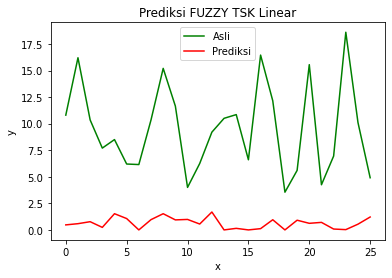

In [203]:
plt.plot(x1, y1,  label = "Asli",  color='green')
plt.plot(x1, y2, label = "Prediksi", color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Prediksi FUZZY TSK Linear')
plt.legend()
plt.show()